In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# Tiempos V1

In [5]:
TIEMPOS_DIR = "./tiempos/v1"

procesos = os.listdir(TIEMPOS_DIR)
# print(procesos)

all_data = []   
for p in procesos:
    path_tiempos = os.path.join(TIEMPOS_DIR, p)
    csv_path = os.path.join(path_tiempos, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
print(df_all)

       N    tiempo  p
0   5000  0.688015  6
1  10000  1.344067  6
2   5000  1.361004  4
3  10000  2.645198  4
4   5000  1.991310  2
5  10000  3.952902  2


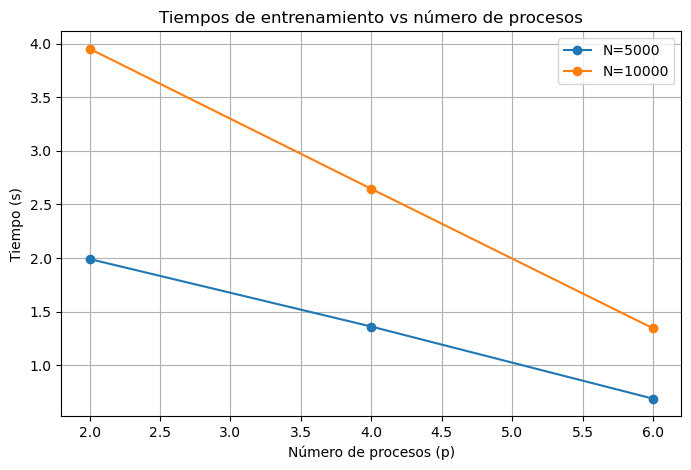

In [6]:
plt.figure(figsize=(8,5))
for n in df_all['N'].unique():
    df_n = df_all[df_all['N'] == n].sort_values('p') 
    plt.plot(df_n['p'], df_n['tiempo'], marker='o', label=f"N={n}")

plt.xlabel("Número de procesos (p)")
plt.ylabel("Tiempo (s)")
plt.title("Tiempos de entrenamiento vs número de procesos")
plt.legend()
plt.grid(True)
plt.show()

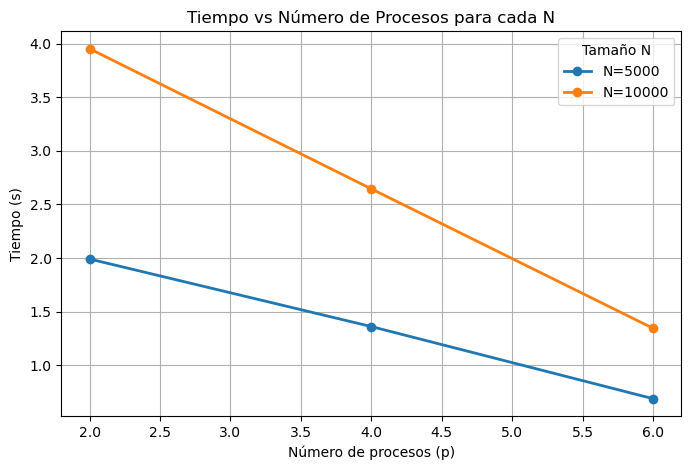

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for n in sorted(df_all['N'].unique()):
    df_n = df_all[df_all['N'] == n].sort_values('p') 
    plt.plot(df_n['p'], df_n['tiempo'], marker='o', label=f"N={n}", linewidth=2)

plt.xlabel("Número de procesos (p)")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Número de Procesos para cada N")
plt.legend(title="Tamaño N")
plt.grid(True)
plt.show()


# v1 vs v2

./graficos/t_vs_p_per_N.png


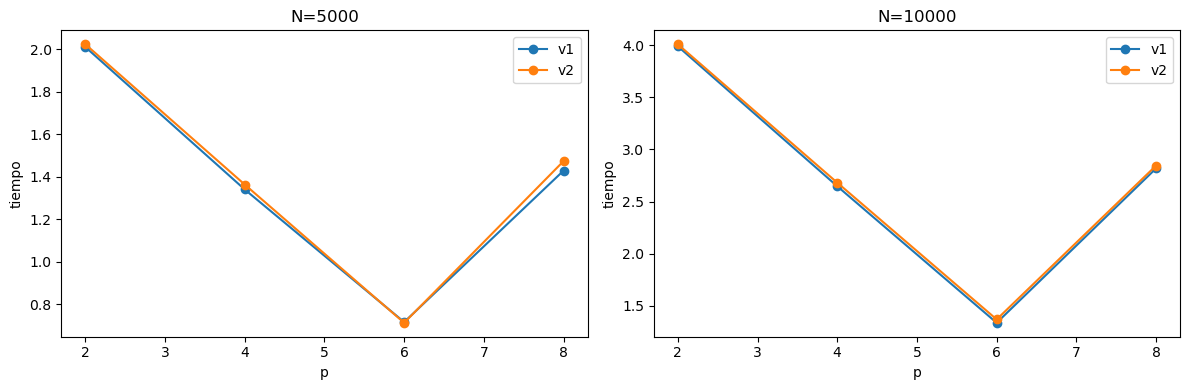

In [11]:
# comparar v1 vs v2 for all p
TIEMPOS_DIR = "./tiempos"
OUT_DIR = "./graficos"
rows = []

for version in sorted(os.listdir(TIEMPOS_DIR)):
    vpath = os.path.join(TIEMPOS_DIR, version)

    for p in sorted(os.listdir(vpath), key=int):
        csv_path = os.path.join(vpath, p, 'tiempos.csv')
        df = pd.read_csv(csv_path)
        df['p'] = int(p)
        df['version'] = version
        rows.append(df[['version', 'p', 'N', 'tiempo']])

df_all = pd.concat(rows, ignore_index=True)
agg = df_all.groupby(['version', 'p', 'N'], as_index=False)['tiempo'].mean()

Ns = sorted(agg['N'].unique())
versions = sorted(agg['version'].unique())

ncols = 2
nrows = (len(Ns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for i, N in enumerate(Ns):
    ax = axes[i]
    for v in versions:
        df_v = agg[(agg['version'] == v) & (agg['N'] == N)].copy()
        df_v = df_v.iloc[df_v['p'].argsort()]
        ax.plot(df_v['p'], df_v['tiempo'], marker='o', label=v)
    ax.set_title(f"N={N}")
    ax.set_xlabel('p')
    ax.set_ylabel('tiempo')
    ax.legend()

for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
out_path = f"{OUT_DIR}/t_vs_p_per_N.png"
fig.savefig(out_path)
print(out_path)
